[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/open-atmos/PySDM.git/main?urlpath=examples/PySDM_examples/Shipway_and_Hill_2012/fig_1.ipynb)
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/open-atmos/PySDM/blob/main/examples/PySDM_examples/Shipway_and_Hill_2012/fig_1.ipynb)

#### based on Fig. 1 from Shipway & Hill 2012 (Q. J. Royal Meteo. Soc. 138)  "_Diagnosis of systematic differences between multiple parametrizations of warm rain microphysics using a kinematic framework_"   
https://doi.org/10.1002/qj.1913

**NOTES**: 
- constant momentum profile rather than constant velocity profile is used herein
- enabling precipitation interpretted as turning on sedimentation and collisions
- pressure at z=0 not given in the paper, assumed (see settings.py)
- domain extended below z=0 to mimic particle inflow

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
if 'google.colab' in sys.modules:
    !pip --quiet install open-atmos-jupyter-utils
    from open_atmos_jupyter_utils import pip_install_on_colab
    pip_install_on_colab('PySDM-examples')

In [3]:
from PySDM_examples.Shipway_and_Hill_2012 import Settings, Simulation, plot
from PySDM.physics import si
from PySDM.exporters import NetCDFExporter_1d

In [4]:
common_params = {
    "n_sd_per_gridbox": 256,
    "dt": 5 * si.s,
    "dz": 50 * si.m,
    "p0": 990 * si.hPa,
    "kappa": .9,
    "particles_per_volume_STP": 50 / si.cm**3
}

output = {}
settings = {}
simulation = {}
for rho_times_w in (
    2 * si.kg/si.m**3 * si.m/si.s,
    3 * si.kg/si.m**3 * si.m/si.s
):
    for precip in (
        False, 
        True,
    ):
        key = f"rhow={rho_times_w}_p={precip}"
        settings[key] = Settings(
            **common_params,
            rho_times_w_1=rho_times_w,
            precip=precip
        )
        simulation[key] = Simulation(settings[key])
        output[key] = simulation[key].run().products


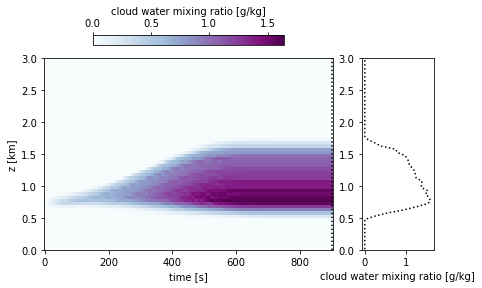

HTML(value="<a href='./qc_rhow=2_p=False.pdf' target='_blank'>./qc_rhow=2_p=False.pdf</a><br>")

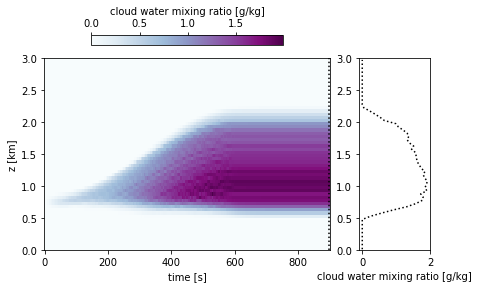

HTML(value="<a href='./qc_rhow=3_p=False.pdf' target='_blank'>./qc_rhow=3_p=False.pdf</a><br>")

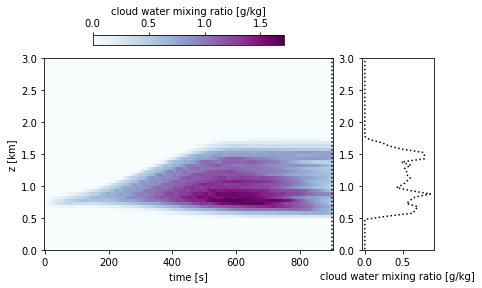

HTML(value="<a href='./qc_rhow=2_p=True.pdf' target='_blank'>./qc_rhow=2_p=True.pdf</a><br>")

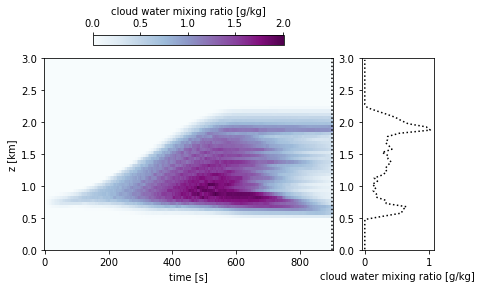

HTML(value="<a href='./qc_rhow=3_p=True.pdf' target='_blank'>./qc_rhow=3_p=True.pdf</a><br>")

In [5]:
for p in (False, True):
    for rho_times_w in (2, 3):
        plot(var='cloud water mixing ratio', qlabel='cloud water mixing ratio [g/kg]', fname=f'qc_rhow={rho_times_w}_p={p}.pdf',
             output=output[f'rhow={rho_times_w}.0_p={p}'])

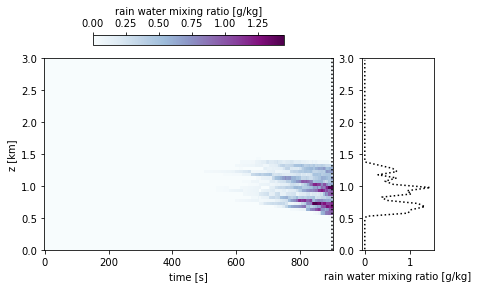

HTML(value="<a href='./qr_rhow=2_p=True.pdf' target='_blank'>./qr_rhow=2_p=True.pdf</a><br>")

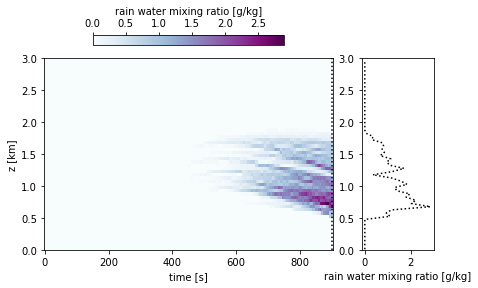

HTML(value="<a href='./qr_rhow=3_p=True.pdf' target='_blank'>./qr_rhow=3_p=True.pdf</a><br>")

In [6]:
p = True
for rho_times_w in (2, 3):
    plot(var='rain water mixing ratio', qlabel='rain water mixing ratio [g/kg]', fname=f'qr_rhow={rho_times_w}_p={p}.pdf',
         output=output[f'rhow={rho_times_w}.0_p={p}'])

In [7]:
for p in (False, True):
    for rho_times_w in (2, 3):
        key = f"rhow={rho_times_w}.0_p={p}"
        filename = 'products_' + key + '.nc'
        nc_exporter = NetCDFExporter_1d(output[key], settings[key], simulation[key], filename)
        nc_exporter.run()

## Collisions Only Test Case

In [36]:
common_params = {
    "n_sd_per_gridbox": 64,
    "dt": 10 * si.s,
    "dz": 50 * si.m,
    "particles_per_volume_STP": 50 / si.cm**3,
    "t_max": 20 * si.minutes
}
precip=True
collisions_only=True
output = {}
settings = {}
simulation = {}
for rho_times_w in (
    0 * si.kg/si.m**3 * si.m/si.s,
):
    key = f"rhow={rho_times_w}_p={precip}_collisions"
    settings[key] = Settings(
        **common_params,
        rho_times_w_1=rho_times_w,
        precip=precip,
        collisions_only=collisions_only
    )
    simulation[key] = Simulation(settings[key])
    output[key] = simulation[key].run().products


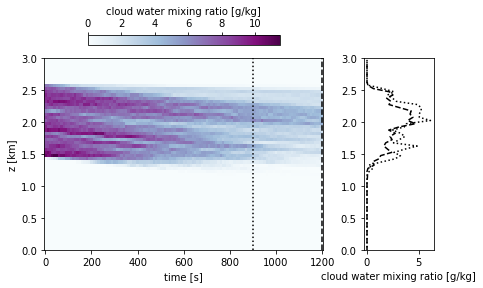

HTML(value="<a href='./qc_rhow=0_p=True.pdf' target='_blank'>./qc_rhow=0_p=True.pdf</a><br>")

In [37]:
for rho_times_w in (0,):
    plot(var='cloud water mixing ratio', qlabel='cloud water mixing ratio [g/kg]', fname=f'qc_rhow={rho_times_w}_p={precip}.pdf',
            output=output[f'rhow={rho_times_w}.0_p={precip}_collisions'])

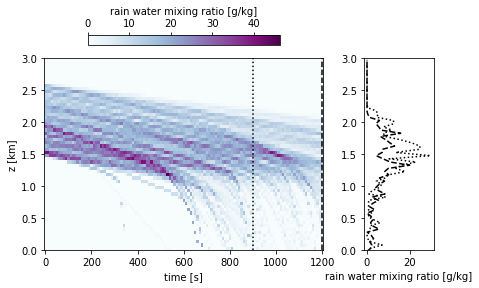

HTML(value="<a href='./qr_rhow=0_p=True.pdf' target='_blank'>./qr_rhow=0_p=True.pdf</a><br>")

In [38]:
p = True
for rho_times_w in (0,):
    plot(var='rain water mixing ratio', qlabel='rain water mixing ratio [g/kg]', fname=f'qr_rhow={rho_times_w}_p={precip}.pdf',
         output=output[f'rhow={rho_times_w}.0_p={precip}_collisions'])

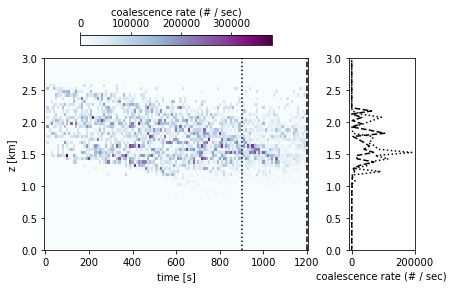

HTML(value="<a href='./coal_rhow=0_p=True.pdf' target='_blank'>./coal_rhow=0_p=True.pdf</a><br>")

In [39]:
p = True
for rho_times_w in (0,):
    plot(var='coalescence_rate', qlabel='coalescence rate (# / sec)', fname=f'coal_rhow={rho_times_w}_p={precip}.pdf',
         output=output[f'rhow={rho_times_w}.0_p={precip}_collisions'])

In [40]:
p = True
for rho_times_w in (0,):
    key = f"rhow={rho_times_w}.0_p={p}_collisions"
    filename = 'products_' + key + 'collisions.nc'
    nc_exporter = NetCDFExporter_1d(output[key], settings[key], simulation[key], filename)
    nc_exporter.run()